In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from umap import UMAP
from bertopic import BERTopic
from hdbscan import HDBSCAN

In [6]:
pubmed = pd.read_csv("../PubMed_dataset.csv")

ROBert_embs = np.load("./PubMed_embeddings.npz")["embeddings"]
print("Embeddings shape:", ROBert_embs.shape)

Embeddings shape: (19716, 768)


In [7]:
umap_model = UMAP(n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(ROBert_embs)
print(f"Original embedding sizes: {ROBert_embs.shape}")
print(f"New embedding sizes: {reduced_embeddings.shape}")

Original embedding sizes: (19716, 768)
New embedding sizes: (19716, 5)


In [9]:
hdbscan_model = HDBSCAN(min_cluster_size=20, metric="euclidean", cluster_selection_method="eom").fit(reduced_embeddings)
clusters = hdbscan_model.labels_
print(f"Number of clusters: {len(set(clusters))}")

Number of clusters: 50


In [ ]:
abstracts = pubmed.Abstract

cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
  print(abstracts[int(index)][:300] + "... \n")

Physical activity and exercise are critical components of diabetes management. Everyone can benefit from regular exercise, but it is even more important for a student with diabetes. In addition to maintaining cardiovascular fitness and controlling weight, physical activity can help to lower blood gl... 

Diabetic osteoporosis is increasingly recognized as a significant comorbidity of type 1 diabetes mellitus. In contrast, type 2 diabetes mellitus is more commonly associated with modest increases in bone mineral density for age. Despite this dichotomy, clinical, in vivo, and in vitro data uniformly s... 

Previous research has suggested that type 1 diabetes mellitus may be due to oxidative stress. The role of oxidative stress in type 2 diabetes is not known. Secoisolariciresinol diglucoside (SDG) antioxidant, obtained from flaxseed, has been reported to prevent type 1 diabetes in a rat model. However... 



(-5.544688892364502,
 17.862950992584228,
 -7.122456955909729,
 14.196923184394837)

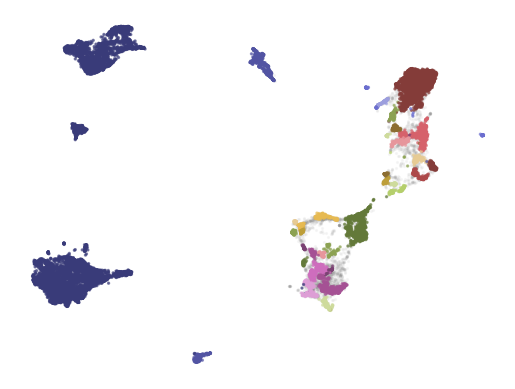

In [15]:
reduced_embeddings = UMAP(
  n_components=2, min_dist=0.0, metric="cosine", random_state=42
).fit_transform(ROBert_embs)


df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = pubmed["Title"]
df["cluster"] = [str(c) for c in clusters]


to_plot = df.loc[df.cluster != "-1", :]
outliers = df.loc[df.cluster == "-1", :]


plt.scatter(outliers.x, outliers.y, alpha=0.05, s=2, c="grey")
plt.scatter(
  to_plot.x, to_plot.y, c=to_plot.cluster.astype(int),
  alpha=0.6, s=2, cmap="tab20b"
)
plt.axis("off")

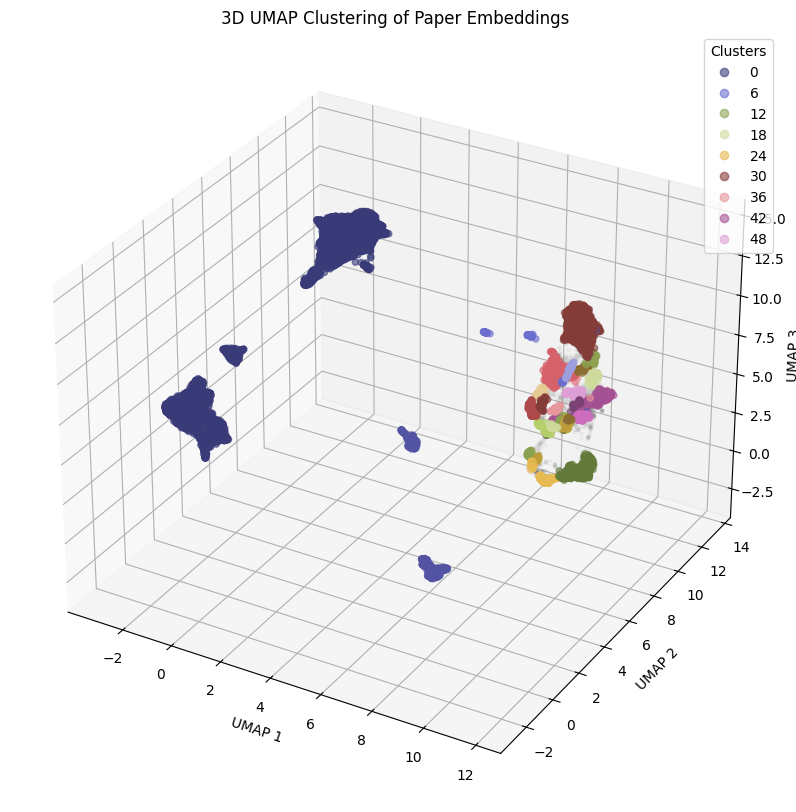

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap


reduced_embeddings_3d = umap.UMAP(
    n_components=3, min_dist=0.0, metric="cosine", random_state=42
).fit_transform(ROBert_embs)


df_3d = pd.DataFrame(reduced_embeddings_3d, columns=["x", "y", "z"])
df_3d["title"] = pubmed["Title"]
df_3d["cluster"] = [str(c) for c in clusters]


to_plot = df_3d.loc[df_3d.cluster != "-1", :]
outliers = df_3d.loc[df_3d.cluster == "-1", :]

# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(outliers.x, outliers.y, outliers.z, alpha=0.05, s=5, c="grey")


scatter = ax.scatter(
    to_plot.x, to_plot.y, to_plot.z, 
    c=to_plot.cluster.astype(int),
    alpha=0.6, s=20, cmap="tab20b"
)

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
ax.set_title("3D UMAP Clustering of Paper Embeddings")

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [21]:
pubmed["cluster_hypergraph"] = list(clusters)

In [ ]:
# Guardo los datos de los clusters generados para los hyperedges
pubmed.to_csv("PubMded_clusterwise.csv", index=False) 